In [ ]:
 %pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import mplfinance as mpf
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [ ]:

def analyze_stock(ticker='XLRE', start_date='2025-01-01', end_date='2025-03-28'):
    """
    Parameters:
    - ticker (str): Stock ticker symbol (e.g., 'USO', 'AAPL')
    - start_date (str, optional): Start date in 'YYYY-MM-DD' format.
    - end_date (str, optional): End date in 'YYYY-MM-DD' format. Defaults to most recent Friday.
    """
   # Set default dates if not provided
    if not start_date:
        start_date = (datetime.now() - timedelta(days=180)).strftime('%Y-%m-%d')

    if not end_date:
        today = datetime.now()
        days_since_friday = (today.weekday() - 4) % 7
        last_friday = today - timedelta(days=days_since_friday)
        end_date = (last_friday + timedelta(days=1)).strftime('%Y-%m-%d')

    # Fetch data
    data = yf.Ticker(ticker)
    price_df = data.history(start=start_date, end=end_date, interval='1h')
    price_df.name = ticker

    # Calculate returns
    price_df['Return'] = price_df['Close'].pct_change()
    price_df['Cumulative_Ret'] = (1 + price_df['Return']).cumprod()
    price_df.at[price_df.index[0], 'Cumulative_Ret'] = 1

    # Calculate total return
    cumulative_ret = price_df.iloc[-1]['Cumulative_Ret'] - 1

    # Set up plot style
    style = mpf.make_mpf_style(
        marketcolors=mpf.make_marketcolors(inherit=True),
        facecolor='w',
        gridstyle='-',
        gridcolor='d9d9d9',
        y_on_right=True,
        edgecolor='262251',
        rc={
            'font.size': 14.0,
            'font.weight': 'light',
            'axes.labelcolor': '262251',
            'text.color': '262251',
            'xtick.color': '262251',
            'ytick.color': '262251',
            'axes.linewidth': 1.5,
            'axes.titlelocation': 'left',
            'figure.titlesize': 20.0
        }
    )

    # Close any existing plots
    plt.close('all')

    # Create new figure and axis
    # Create new figure and axis
    fig = mpf.figure(figsize=(7.53*2, 3.24*2), style=style)
    ax = fig.add_subplot(1, 1, 1)

    # Plot using mplfinance
    mpf.plot(
        price_df,
        type='line',
        style=style,
        ax=ax,
        datetime_format=' %#m/%#d/%y',
        ylabel=f'Price (USD)',
        xrotation=0,
        linecolor='#4e59af',
        scale_width_adjustment=dict(lines=2),
        show_nontrading=False,
        tight_layout=True
    )

    # Add title with performance
    fig.suptitle(
        f"{ticker}: {'+' if cumulative_ret >= 0 else ''}{cumulative_ret:.2%} since {start_date}",
        ha='left',
        va='top',
        y=.94,
        x=0.18
    )

    return fig

# analyze_stock('AAPL', '2024-01-01', '2024-03-01')  # Specific date range

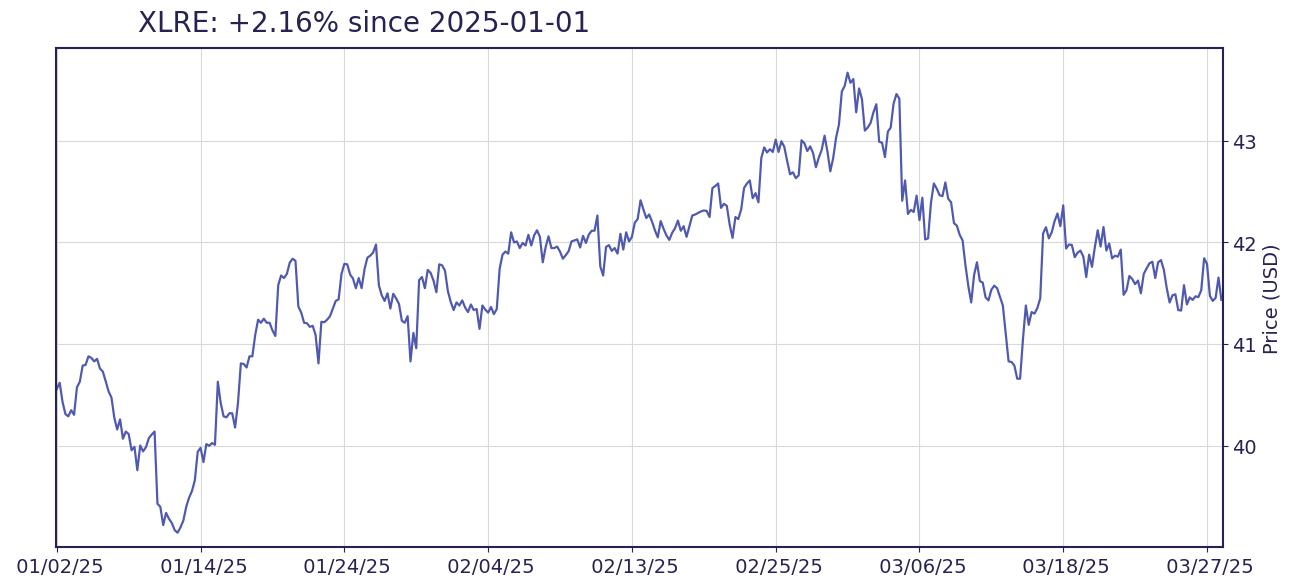

In [ ]:
### Change this code block (analyze_stock('Ticker',start_date in YYYY-MM-DD format, end_date in YYYY-MM-DD format))


fig = analyze_stock('XLRE', '2025-01-01','2025-3-28')
plt.show()